<a href="https://colab.research.google.com/github/varshit007/CV/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
scores = files.upload()

import pandas as pd
scores = pd.read_csv(
    'scores.txt', sep="\t",header=None)

In [ ]:
import numpy as np
from scipy import stats
from statistics import variance

midterm_scores = scores[1].to_numpy()
print(np.max(midterm_scores)) # max
print(np.min(midterm_scores)) # min
print(scores[1].quantile([0.25,0.75])) # quartiles 
print(np.median(midterm_scores)) # median 
print(np.mean(midterm_scores)) # mean 
print(stats.mode(midterm_scores)) # mode 
print(np.var(midterm_scores)) # Variance 

'''
1. 
(a) Maxium of midterm scores = 100
    Minumum of midterm scores = 37
    We can compute max and min by visually going to the entire data, or by making a box plot and finding the values of the whiskers. 
(b) First quartile Q1 = 68
    Median = 77
    Third quartile Q1 = 87
    Quartiles can be computed manually by arranging in ascending order and calculating the ((n+1)/4) th number for Q1 and (3(n+1)/4) th number for Q3. 
    Median is Q2 = ((n+1)/2) nd number
(c) Mean = 76.715
    Mean can be computed by adding all the scores and dividing by the total number of mid-term scores 
(d) Mode = 77, occurs 37 times
    Mode is calculated by finding the most repeating socre. 
(e) Variance = 173.106
    Variance can be calculated using this formula - (1/n) Σ(i=1 to n)((x_i - mean)^2)
'''

In [ ]:
'''
2.
Total number of people in the histogram = 46+64+79+92+65+53+35+32+27 = 493 = n
Median hourly pay would be the pay of (n/2) th person (246) after the pays are arranged in increasing order (which is true in the given histogram) 
We start counting from $5 per hour, 0+46+64+79 = 189. If we add 92 to that, we will get 281, which is more than 246. 
Therefore out median interval is in between $20-30 / hour. Since 246 is fairly in between 189 and 281, we can approximate the median to be in between 20-30, so the median is approximately $25/hour.  
'''

In [ ]:
from scipy.stats import zscore
from scipy.stats import pearsonr

midterm_normalized = zscore(scores[1])
print(np.var(midterm_normalized)) # Variance of midterm_normalized
corr, _ = pearsonr(midterm_scores, scores[2])
print(corr)
corr2, _ = pearsonr(midterm_normalized, scores[2])
print(corr2)
print(np.cov(midterm_scores, scores[2])[1][0])

(3)
(a) Variance of midterm-original as previously calculated = 173.106. Variance of midterm-normalized using zscore normalization = 0.9999999999999998 ≈ 1. We notice that the variance is 1, this is because after we normalize the data, the data takes the form of a normal distribution, in which the mean is 0 and the variance is 1.  

(b) Given a score of 90, mean of 76.715 and variance of 173.106, the z-score of datapoint 90 is (90 - 76.715) / sqrt(173.106) = 1.010

(c) 0.544
Pearson coefficient can be calculated using : 
Here, A and B are our midterm-original and finals-original vectors
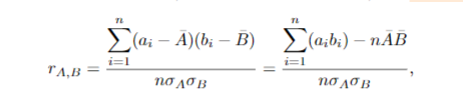

(d) 0.544
Here, A and B are our midterm-normalized and finals-original vectors

(e) Covariance can be calculated using the formula shown in the image. So in our case, 'A' is midterm-original and 'B' is finals-original. Therefore, Cov(A,B) = 78.254

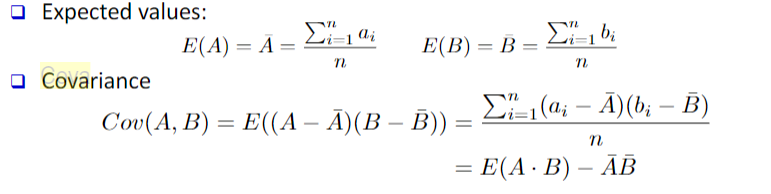 

In [ ]:
from google.colab import files
books = files.upload()

import pandas as pd
books = pd.read_csv(
    'books.txt', sep="\t",header=None)

In [ ]:
CML = books.iloc[1][1:]
CML = CML.to_numpy() 
CML = CML.astype(int)
CBL = books.iloc[2][1:]
CBL = CBL.to_numpy()
CBL = CBL.astype(int)

from scipy.spatial import distance

print(distance.minkowski(CML, CBL, 1)) 
print(distance.minkowski(CML, CBL, 2)) 
print(distance.minkowski(CML, CBL, float('inf'))) 
import scipy.spatial.distance as dist
print(dist.chebyshev(CML, CBL)) # same as minkowski for h->inf

from scipy import spatial
print(1 - spatial.distance.cosine(CML, CBL)) # Need to subtract from 1 as 'cosine' returns distance, not similarity. 

print(sklearn.metrics.mutual_info_score(CML,CBL))

(4)
We can compute Minkowski distance using the formula in the image. i and j are our CML and CBL vecotrs. 
Note, 'p' in the image is equivalent to 'h' in the question.

(a) (i) h=1: 6152

(ii) h=2: 715.328 

(iii) h=infinity: 170 : 
For this, we use the same formula, but we take the limit of the formula as h->inf
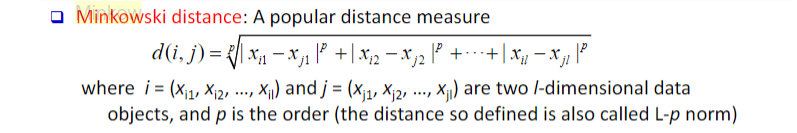

(b) 
Cosine similarity can be calculated using this formula. For our question, d1 and d2 are CML and CBL vectors respectively, and the value of similarity is 0.841

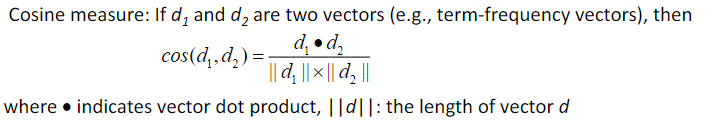

(c) KL Divergence can be calculated using the formula below. For our question, the divergence is 3.931
The formula for calculating p(x) and q(x) is given in the question (i1/i1+i2+...i100) 

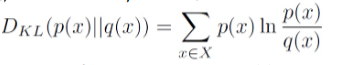

In [ ]:
'''
5.
(a) Distance = (r+s) / (q+r+s+t) = (40+15) / (150+40+15+3300) = 55/3505 = 0.0157
(b) Jaccard coefficient = q / (q+r+s), where q = 150, r = 40, s = 15
    Therefore sim(jaccard) = 150 / (150+40+15) = 0.732
(c) The expected frequencies for each cell can be calculated using this formula - count(A=ai)×count(B=bj) / n
    For example, the expected frequency for the cell (Buy Diaper, Buy Beer) = (165*190)/3505 = 8.944
    Contingency table: 
                          Buy Diaper        Do not buy diaper       Total
    Buy Beer                150 (8.944)          40   (181.056)      190
    Do not Buy Beer         15  (156.056)        3300 (3158.944)     3315
    Total                   165                  3340                3505
    X^2 statistic = (150-8.944)^2 / (8.944) + (15-156.056)^2 / (156.056) + (40-181.056)^2 / (181.056) + (3300-3158.944)^2 / (3158.944)
                  = 2468.286
(d) From textbook chapter2: 
    For  this  2×2  table,  the  degrees  of  freedom  are  (2−1)(2−1)  =  1.   
    For  1 degree  of  freedom,  the χ2 value  needed  to  reject  the  hypothesis  at  the  0.05 significance level is 3.841
    Since our  computed  value  is  above  this,  we  can  reject  the  hypothesis  that Buy Diaper and Buy Beer are independent
'''